In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import nltk

In [2]:
# Read in data
df = pd.read_csv('Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


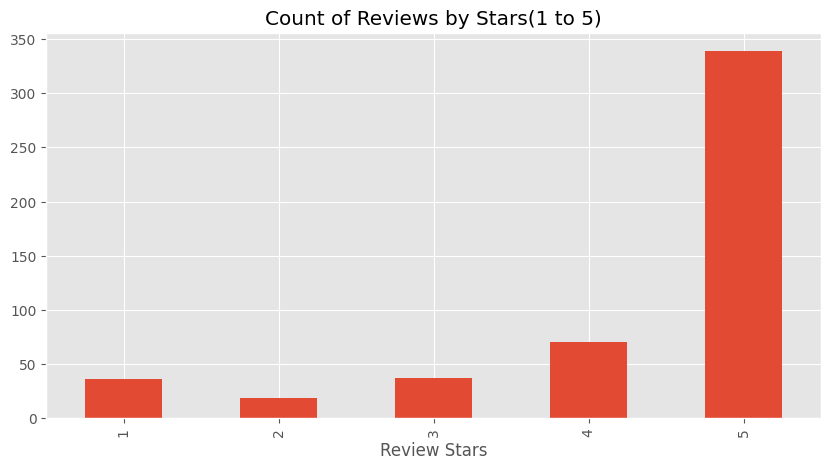

In [4]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars(1 to 5)',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [5]:
example = df['Text'][4]
print(example)

Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.


In [6]:
tokens = nltk.word_tokenize(example)
print(tokens)

['Great', 'taffy', 'at', 'a', 'great', 'price', '.', 'There', 'was', 'a', 'wide', 'assortment', 'of', 'yummy', 'taffy', '.', 'Delivery', 'was', 'very', 'quick', '.', 'If', 'your', 'a', 'taffy', 'lover', ',', 'this', 'is', 'a', 'deal', '.']


In [7]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
print(tagged)

[('Great', 'NNP'), ('taffy', 'NN'), ('at', 'IN'), ('a', 'DT'), ('great', 'JJ'), ('price', 'NN'), ('.', '.'), ('There', 'EX'), ('was', 'VBD'), ('a', 'DT'), ('wide', 'JJ'), ('assortment', 'NN'), ('of', 'IN'), ('yummy', 'NN'), ('taffy', 'NN'), ('.', '.'), ('Delivery', 'NNP'), ('was', 'VBD'), ('very', 'RB'), ('quick', 'JJ'), ('.', '.'), ('If', 'IN'), ('your', 'PRP$'), ('a', 'DT'), ('taffy', 'NN'), ('lover', 'NN'), (',', ','), ('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('deal', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Great/NNP)
  taffy/NN
  at/IN
  a/DT
  great/JJ
  price/NN
  ./.
  There/EX
  was/VBD
  a/DT
  wide/JJ
  assortment/NN
  of/IN
  yummy/NN
  taffy/NN
  ./.
  (PERSON Delivery/NNP)
  was/VBD
  very/RB
  quick/JJ
  ./.
  If/IN
  your/PRP$
  a/DT
  taffy/NN
  lover/NN
  ,/,
  this/DT
  is/VBZ
  a/DT
  deal/NN
  ./.)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/mac/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [10]:
sia = SentimentIntensityAnalyzer()
sia

In [11]:
sia.polarity_scores("Abdullah is a good boy")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [12]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}

In [13]:

res ={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    id = row['Id']
    res[id] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
res

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [21]:
pd.DataFrame(res).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
496,0.000,0.554,0.446,0.9725
497,0.059,0.799,0.142,0.7833
498,0.025,0.762,0.212,0.9848
499,0.041,0.904,0.055,0.1280


In [24]:
vader = pd.DataFrame(res).T
vader = vader.reset_index().rename(columns={'index': 'Id'})
vader = vader.merge(df, how='left')

In [26]:
vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


<bound method Axes.plot of <Axes: title={'center': 'Distribution of VADER Compound Scores by Review Score'}, xlabel='Score', ylabel='compound'>>

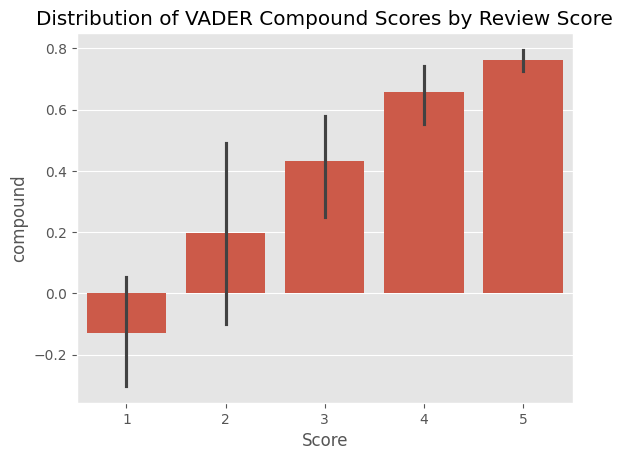

In [29]:
ax = sns.barplot(x='Score', y='compound', data=vader)
ax.set_title('Distribution of VADER Compound Scores by Review Score')
ax.plot

<bound method Axes.plot of <Axes: title={'center': 'Mean VADER Compound Score by Review Score'}, xlabel='Score', ylabel='pos'>>

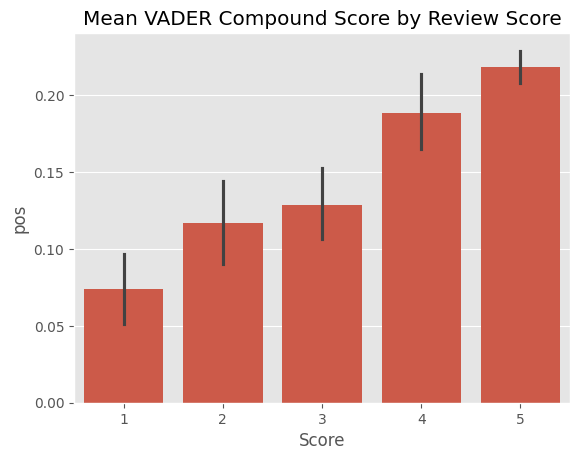

In [32]:
ax = sns.barplot(x='Score', y='pos', data=vader, estimator=np.mean)
ax.set_title('Mean VADER Compound Score by Review Score')
ax.plot

In [33]:
!python3 -m pip install transformers 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 570.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 791.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.4/346.4 kB 707.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 798.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.3/426.3 kB 811.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.0 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 989.0 kB/s eta 0:00:00 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [35]:
import transformers